<a href="https://colab.research.google.com/github/SiiHyunn/DipLearning_2021/blob/main/Assignment02_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

count    6497.000000
mean        1.159458
std         0.459707
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: new_quality, dtype: float64
1.0    4974
2.0    1272
0.0     246
3.0       5
Name: new_quality, dtype: int64


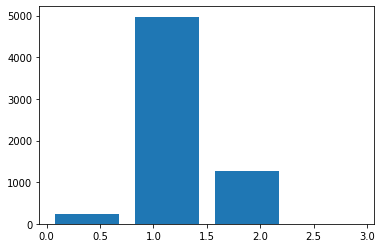

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
red['type'] = 0
white['type'] = 1
wine = pd.concat([red, white])
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

wine.loc[wine['quality'] <= 4, 'new_quality'] = 0
wine.loc[(wine['quality'] == 5) | (wine['quality'] == 6), 'new_quality'] = 1
wine.loc[(wine['quality'] == 7) | (wine['quality'] == 8), 'new_quality'] = 2
wine.loc[wine['quality'] == 9, 'new_quality'] = 3

print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())

plt.hist(wine['new_quality'], bins=4, rwidth=0.8)
plt.show()

In [ ]:
del wine['quality']
wine_backup = wine.copy()
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_norm['new_quality'] = wine_backup['new_quality']
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

train_idx = int(len(wine_np) * 0.8)
train_X, test_X = wine_np[:train_idx, :-1], wine_np[train_idx:, :-1]

Y = tf.keras.utils.to_categorical(wine_np[:,-1], num_classes=4)
train_Y, test_Y = Y[:train_idx], Y[train_idx:]

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=30, batch_size=200, validation_split=0.25)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/30
20/20 [==============================] - 3s 15ms/step - loss: 1.3342 - accuracy: 0.5266 - val_loss: 1.2293 - val_accuracy: 0.7454
Epoch 2/30
20/20 [==============================] - 0s 5ms/step - loss: 1.1182 - accuracy: 0.7693 - val_loss: 0.9825 - val_accuracy: 0.7454
Epoch 3/30
20/20 [==============================] - 0s 5ms/step - loss: 0.8417 - accuracy: 0.7693 - val_loss: 0.7489 - val_accuracy: 0.7454
Epoch 4/30
20/20 [==============================] - 0s 6ms/step - loss: 0.6715 - accuracy: 0.7693 - val_loss: 0.6850 - val_accuracy: 0.7454
Epoch 5/30
20/20 [==============================] - 0s 6ms/step - loss: 0.6366 - accuracy: 0.7693 - val_loss: 0.6703 - val_accuracy: 0.7454
Epoch 6/30
20/20 [==============================] - 0s 6ms/step - loss: 0.6218 - accuracy: 0.7693 - val_loss: 0.6549 - val_accuracy: 0.7454
Epoch 7/30
20/20 [==============================] - 0s 5ms/step - loss: 0.6065 - accuracy: 0.7693 - val_loss: 0.6381 - val_accuracy: 0.7454
Epoch 8/30
20/20 [=

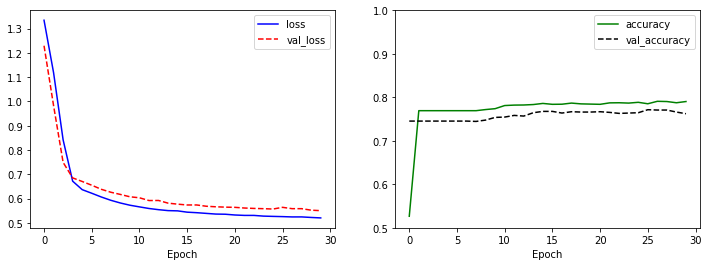

41/41 [==============================] - 0s 3ms/step - loss: 0.5549 - accuracy: 0.7754


[0.5549436807632446, 0.7753846049308777]

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.5, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y)